# [Peplograhy - a passive 3D photon counting imaging through scattering media](https://opg.optica.org/ol/abstract.cfm?uri=ol-41-22-5401)
Myungjin Cho, Bahram Javidi

### Basic concept of the Peplography is followed image.
<p align="center">
    <img src = "https://github.com/user-attachments/assets/eac7a617-9e03-462c-9cc9-2198dfa1d5dd", width="600", height="400">
</p>

### Theory 1 (Removal scattering media)
In this theory, we learned the novel dynamic passive imaging technique through scattering media by dircetly **ballistic photons** emanating from objecty based on statistical optics.<br/>
It assumed that the intensity and phase of the light propagating through scattering media are randomized.<br/>
To estimate scattering media form a single peplogram, we apply a statistical estimation method, such as maximum likelihood estimation(MLE)<br/>
We assume that the scattering media is composed of many scaattering part s with dimension of $w_x \times w_y$ <br/>
The scattering media is modeled by **Gaussian distrbiution** with a sample mean $\mu_{ij}$ and variance $\sigma^2_{ij}$, where $i$ and $j$ are the indiecs of each scattering part in the $x$ and $y$ directions, repectively. <br/>
Thre random variables are denoted as

$$
X_{ij}(m,n) = I_p(i+m-1, j+n-1),
$$
$$
\begin{aligned}
i &= 1, 2, 3, ..., N_x - w_x + 1 \\
j &= 1, 2, 3, ..., N_y - w_y + 1 ,
\end{aligned}
$$
$$
\begin{aligned}
for \\
m &= 1, 2, 3, ..., w_x \\
n &= 1, 2, 3, ..., w_y 
\end{aligned}
$$

where $X_{ij}$ is a $i$th column and $j$th row local area of a peplogram, $I_p$ is the pixel intensity of the peplogram, and $N_x$, $N_y$ are the total number of pixels i the $x$ and $y$ directions of the peplogram, repectively.<br/>
We estimate the scattering media by finding the unknown parameter $\mu_{ij}$ (Sample mean) of a Gaussian distribution using the MLE method as follows:
$$
\begin{aligned}
L(X_{ij}(m,n)|\mu_{ij}, \sigma^2_{ij}) 
&= \prod^{w_x}_{m=1}\prod^{w_y}_{n=1}\frac{1}{\sqrt{2\pi \sigma^2_{ij}}}exp\left[-\frac{\{x_{ij}(m,n)-\mu_{ij}\^2}{2\sigma^2_{ij}}\right]
 \\
&= \frac{1}{\sqrt{2\pi \sigma^2_{ij}}}exp\left[-\sum^{w_x}_{m=1}\sum^{w_y}_{n=1}\frac{\{x_{ij}(m,n)-\mu_{ij}\}^2}{2\sigma_{ij}}\right],
\end{aligned}
$$
After applying the log transform, we obtain
$$
l\left\{X_{ij}(m,n)|\mu_{ij},\sigma^2_{ij}\right\}=log\left(\frac{1}{\sqrt{2\pi \sigma^2_{ij}}}\right) - \sum^{w_x}_{m=1}\sum^{w_y}_{n=1}\frac{\{x_{ij}(m,n)-\mu_{ij}\}^2}{2\sigma^2}
$$
The estimated scattering medium is
$$
\begin{aligned}
\hat{\mu}_{ij} &= arg \left[max_{\mu_{ij}}l\{X_{ij}(m,n)|\mu_{ij}\}\right] \\
&=\frac{1}{w_xw_y}\sum^{w_x}_{m=1}\sum^{w_y}_{n=1}x_{ij}(m,n)
\end{aligned}
$$



The peplogram $I'_p$ after removing the scattering media is expressed by the following equation:
$$I'_p(i,j)=I_p(i,j)-\hat{\mu}_{ij}$$

### Python practice
##### Extract scattering media
Load the related library in python

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
# "reference image path"
refPath = "reference image path"
# "target image path"
targetPath = "target image path"

We use the opencv and matplotlib. There are different describe type. Opencv's color channel is consist as Blue, Green, Red.<br/>
However, the Matplotlib is describe as Red, Green, Blue. So, we need to change the color channel's sequence.

In [75]:
refBGR = cv2.imread(refPath, cv2.IMREAD_COLOR)
tarBGR = cv2.imread(targetPath, cv2.IMREAD_COLOR)

refRGB = np.array(cv2.cvtColor(refBGR, cv2.COLOR_BGR2RGB)) #/255.0
tarRGB = np.array(cv2.cvtColor(tarBGR, cv2.COLOR_BGR2RGB)) #/255.0

To check the image, we use the imshow, However, I don't like the see the axis in images, we also use ```plt.axis("off")```

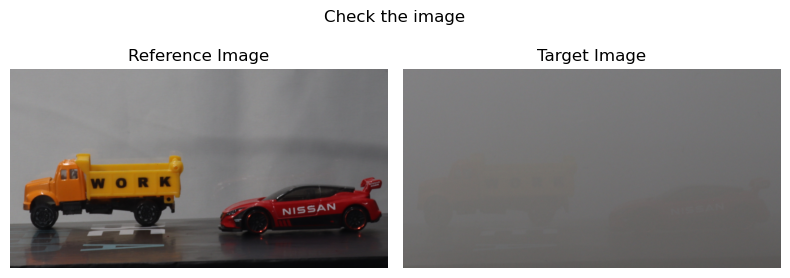

In [76]:
plt.figure("Check the image", figsize=(8,3))
plt.suptitle("Check the image")

plt.subplot(1, 2, 1)
plt.title("Reference Image")
plt.imshow(refRGB)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Target Image")
plt.imshow(tarRGB)
plt.axis("off")

plt.tight_layout()
plt.show()

Using the upper equation, we estimate the scattering media in Target image

In [77]:
Wx, Wy = 1000, 1000
estimationWindows = np.ones((Wx, Wy)) / (Wx * Wy)

scatteringMedia = cv2.filter2D(tarRGB, -1, estimationWindows)

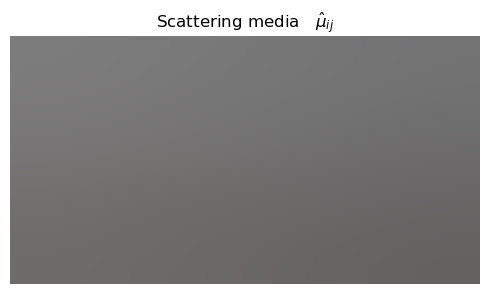

In [78]:
plt.figure("Scattering media", figsize=(5,3))
plt.title("Scattering media   $\hat{\mu}_{ij}$")
plt.imshow(scatteringMedia)
plt.axis("off")
plt.tight_layout()
plt.show()

Removal the scattering media with following equation:
$$I'_p(i,j) = I_p(i,j) - \hat{\mu}_{ij}$$

In [179]:
Ip = tarRGB - scatteringMedia
# Ip = np.uint8(Ip)
# Ip[Ip < 0] = 0
Ip = (Ip - Ip.min())/(Ip.max() - Ip.min())

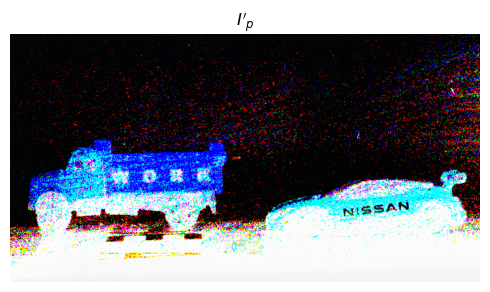

In [180]:
plt.figure("$I'_p$", figsize=(5,3))
plt.title("$I'_p$")
plt.imshow(Ip)
plt.axis("off")
plt.tight_layout()
plt.show()

### Theory 2 (Intensity restore)
To recover the dropped intensity in reconstuction image, we use the Photon counting detection model. A Photon counting model is expressed as follows:<br/>
$$
\~{I_p}(i,j)=\frac{I'_p(ij)}{\sum_i\sum_jI'_p(i,j)}
$$
where $I'_p$ is the processed peplogram and $(w_x, w_y)$ are the scattering windows local dimensions used in the previous estimation, respectively, The reconstructed peplogram using photon counting model is
$$
\hat{I_p}(i,j)|\~{I_p}(i,j) \sim Poisson[\gamma_c N_p \~I_p(i,j)],
$$
where $N_p$, $c$, and $\gamma_c$ are the expected number of the ballistic photons from the normalized irraiance peplogram, the index of the color channels (R, G, and B) and the coefficient of the ballistic photons from each color channel, repectively.<br/>
Here, several ballistic photons may be extracted at a single pixel by multiplying coefficient $\gamma_c N_p$ with the highest probability of Photon distribution. Therefore, the reconstructed image can be obtained.

For each basic color channel(i.e., R, G, and B), different coefficients should be applied to the normalized irradiance peplogram.<br/>
The coefficients of the ballistic photons $\gamma_c$ can be defined with R, G, and B channels by
$$
\gamma_c = \frac{\eta}{h\overline{\nu}_c},
$$
where $\eta$ is the quantum effciency, which represents the average number of phtoevents produced by each incident photon $(\eta \geq 1)$; $h$ is Planck's constant; and $\overline{\nu}_c$ is mean optical frequency of the radiation, respectively. <br/>
Thus, they can be set to be 1.4497, 1.1270, and 1, respectively, because we set B channel as the reference and the average wavelengths of each color channel adre set to be 685nm (R:620 ~ 750nm), 532.5nm (G:495 ~ 570nm), and 472.5nm (B:450 ~ 495nm), respectively.

##### Photon counting detection model

In [170]:
def PCmodel(img, Np):
    """
    image Matrix, Number of Photons
    :param img: 2D or 3D image(grayscale or color image)
    :param Np: Number of Photons
    :return: Normalize image (Max = 1, Min = 0)
    """
    Planck = 6.62607015e-34
    img = np.array(img)

    width, height = img.shape[0], img.shape[1]
    
    if img.ndim == 2:
        NormImg = img / np.sum(img)
        # Poisson distrbution in Numpy can't calculate about 2 or multi dimensions.    
        linearImg = NormImg.copy().flatten()
        photonDetection = np.random.poisson(Np*linearImg)
    
        addPhoton = linearImg + photonDetection
        
        # if the value is over the 1, that pixels are saturated pixels
        reconImg = np.clip(addPhoton, 0, 1)
        return reconImg.reshape(width, height)
    else:
        gamma = [1.4497, 1.1270, 1] # R, G, B's gamma values, respectively
        colorImg = np.zeros_like(img)
        for channel in enumerate(gamma):
            NormImg = img[:, :, channel[0]] / np.sum(img[:, :, channel[0]])
            linearImg = NormImg.copy().flatten()
            photonDetection = np.random.poisson(Np*linearImg*channel[1])
            
            addPhoton = photonDetection
            reconImg = np.clip(addPhoton, 0, 1)
            colorImg[:, :, channel[0]] += reconImg.reshape(width, height)
        return np.array(colorImg)

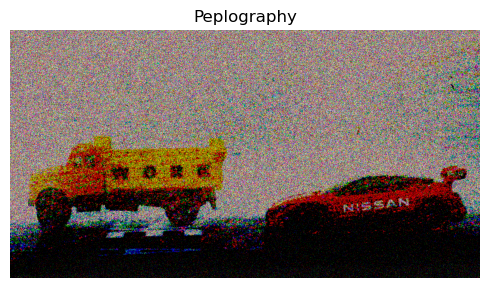

In [186]:
PC = PCmodel(1-Ip, 1000000)

plt.figure("Peplography", figsize=(5,3))
plt.title("Peplography")
plt.imshow(PC)
plt.axis("off")
plt.tight_layout()
plt.show()

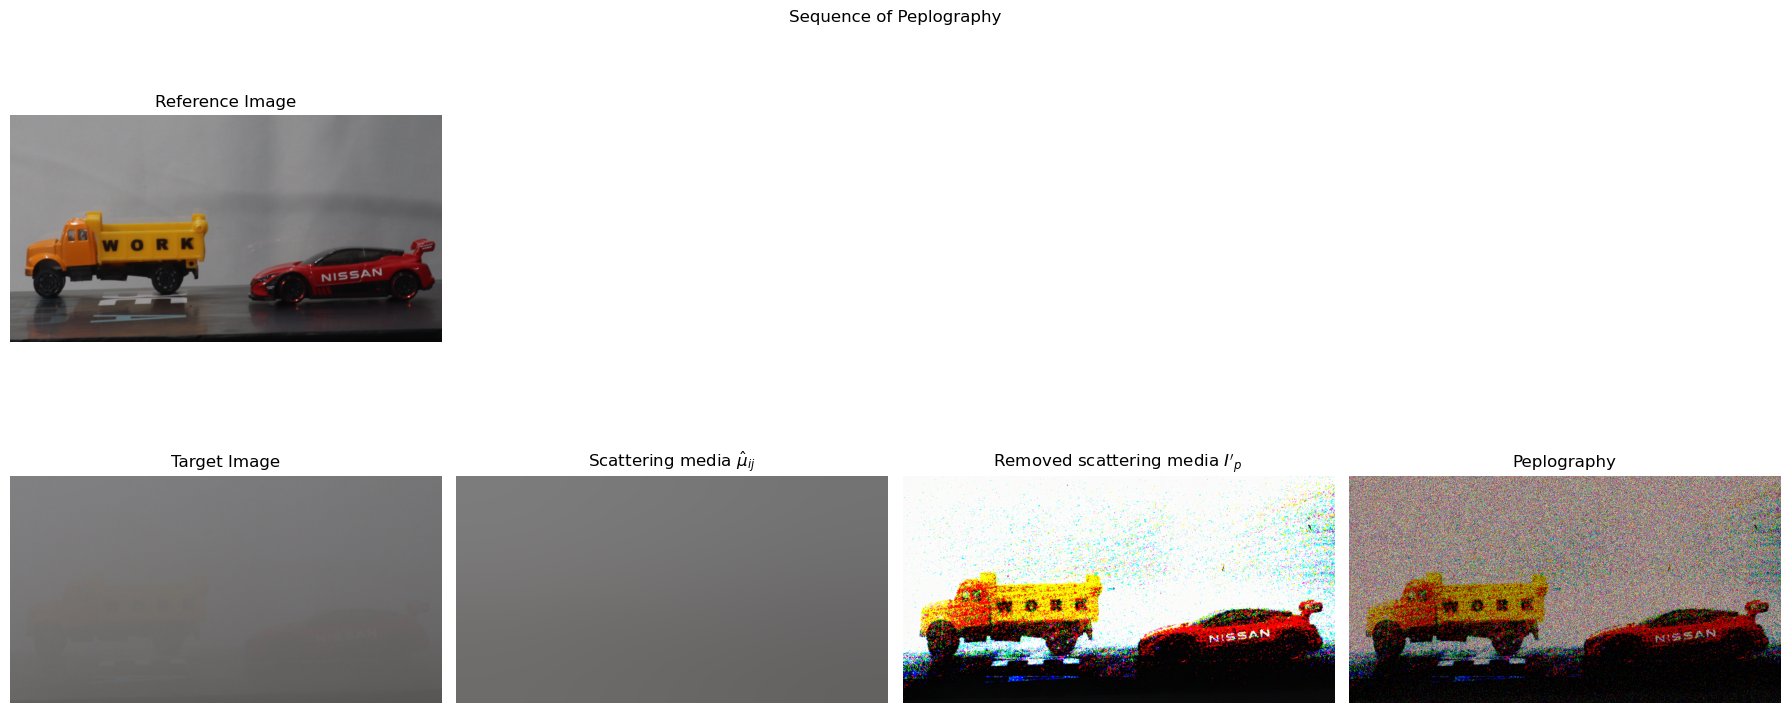

In [187]:
plt.figure("Sequence of Peplography", figsize=(18,8))
plt.suptitle("Sequence of Peplography")

plt.subplot(2, 4, 1)
plt.title("Reference Image")
plt.imshow(refRGB)
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title("Target Image")
plt.imshow(tarRGB)
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title("Scattering media $\hat{\mu}_{ij}$")
plt.imshow(scatteringMedia)
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title("Removed scattering media $I'_p$")
plt.imshow(1-Ip)
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title("Peplography")
plt.imshow(PC)
plt.axis("off")

plt.tight_layout()
plt.show()

##### Fully included function

In [188]:
def passivePeplography(haze, Np=100000, Wx=1000, Wy=1000):
    haze = np.array(haze)
    
    width, height = haze.shape[0], haze.shape[1]
    estimationWindows = np.ones((Wx, Wy)) / (Wx * Wy)

    scatteringMedia = cv2.filter2D(tarRGB, -1, estimationWindows)

    Ip = haze - scatteringMedia
    
    Ip = (Ip - Ip.min())/(Ip.max() - Ip.min())
    
    photonCounting = PCmodel(Ip, Np)
    
    return photonCounting

In [189]:
def PCmodel(img, Np):
    """
    image Matrix, Number of Photons
    :param img: 2D or 3D image(grayscale or color image)
    :param Np: Number of Photons
    :return: Normalize image (Max = 1, Min = 0)
    """
    Planck = 6.62607015e-34
    img = np.array(img)

    width, height = img.shape[0], img.shape[1]

    if img.ndim == 2:
        NormImg = img / np.sum(img)
        # Poisson distrbution in Numpy can't calculate about 2 or multi dimensions.    
        linearImg = NormImg.copy().flatten()
        photonDetection = np.random.poisson(Np*linearImg)

        addPhoton = linearImg + photonDetection

        # if the value is over the 1, that pixels are saturated pixels
        reconImg = np.clip(addPhoton, 0, 1)
        return reconImg.reshape(width, height)
    else:
        gamma = [1.4497, 1.1270, 1] # R, G, B's gamma values, respectively
        colorImg = np.zeros_like(img)
        for channel in enumerate(gamma):
            NormImg = img[:, :, channel[0]] / np.sum(img[:, :, channel[0]])
            linearImg = NormImg.copy().flatten()
            photonDetection = np.random.poisson(Np*linearImg*channel[1])

            addPhoton = photonDetection
            reconImg = np.clip(addPhoton, 0, 1)
            colorImg[:, :, channel[0]] += reconImg.reshape(width, height)
        return np.array(colorImg)